# Laboratorio: Análisis de Regresión

### Antes de empezar:

* Lee el archivo README.md
* Comenta tanto como puedas y utiliza los recursos (archivo README.md)

¡Feliz aprendizaje!

## Desafío 1
Trabajo en un bootcamp de programación, y he desarrollado una teoría de que cuanto más jóvenes son mis estudiantes, más a menudo llegan tarde a clase. Para probar mi hipótesis, he recopilado algunos datos en la siguiente tabla:

| StudentID | Edad | Retrasos |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |


In [190]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

Utiliza este comando para crear un dataframe con los datos proporcionados en la tabla.
~~~~
student_data = pd.DataFrame({'Edad': [17,51,27,21,36,48,19,26,54,30], 'Retrasos': [10,1,5,9,4,2,9,6,0,3]})
~~~~

In [191]:
student_data = pd.DataFrame({'Edad': [17,51,27,21,36,48,19,26,54,30], 'Retrasos': [10,1,5,9,4,2,9,6,0,3]})

Dibuja un diagrama de dispersión (scatter plot) para los datos.

<Axes: xlabel='Edad', ylabel='Retrasos'>

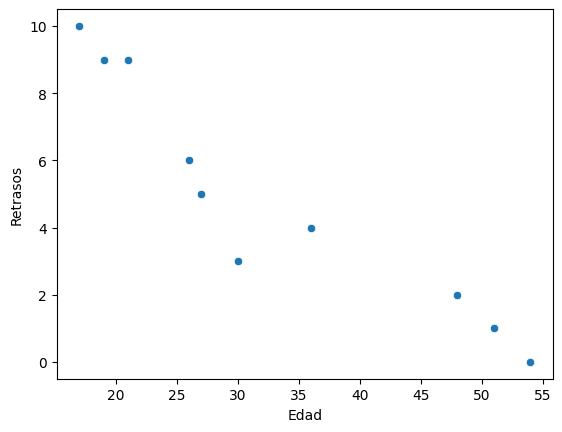

In [192]:
sns.scatterplot(data=student_data, x='Edad', y='Retrasos')

¿Ves alguna tendencia? ¿Puedes hacer alguna hipótesis sobre la relación entre la edad y el número de retrasos?

#As age advances, the amount of times of being late also decreases

Calcula la covarianza y la correlación de las variables en tu gráfico. ¿Cuál es la diferencia entre estas dos medidas? Compara sus valores. ¿Qué te indican en este caso? Agrega tus respuestas como comentarios después de tu código.

In [193]:
print(student_data.corr())
print(student_data.cov())

print(np.cov(student_data['Edad'], student_data['Retrasos']))

              Edad  Retrasos
Edad      1.000000 -0.939163
Retrasos -0.939163  1.000000
                Edad   Retrasos
Edad      187.655556 -45.566667
Retrasos  -45.566667  12.544444
[[187.65555556 -45.56666667]
 [-45.56666667  12.54444444]]


Construye un modelo de regresión para estos datos. ¿Cuál será tu variable de resultado? ¿Qué tipo de regresión estás utilizando? Agrega tus respuestas como comentarios después de tu código.

In [194]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

In [195]:
Student_x = student_data[['Edad']]
Student_y = student_data[['Retrasos']]

Student_x_train, Student_x_test, Student_y_train, Student_y_test = train_test_split(Student_x,Student_y, test_size=0.2, random_state=122)

In [196]:
lm = LinearRegression()

lm.fit(Student_x_train, Student_y_train)

print(lm.intercept_, lm.coef_)
print(lm.score(Student_x_train, Student_y_train), lm.score(Student_x_test, Student_y_test))


[13.1471122] [[-0.24970642]]
0.8501649306486319 0.9698731325085547


In [197]:
y_train_predict = lm.predict(Student_x_train)

y_test_predict = lm.predict(Student_x_test)

print(r2_score(Student_y_train,y_train_predict), r2_score(Student_y_test, y_test_predict))

0.8501649306486319 0.9698731325085547


Grafica tu modelo de regresión en tu diagrama de dispersión.

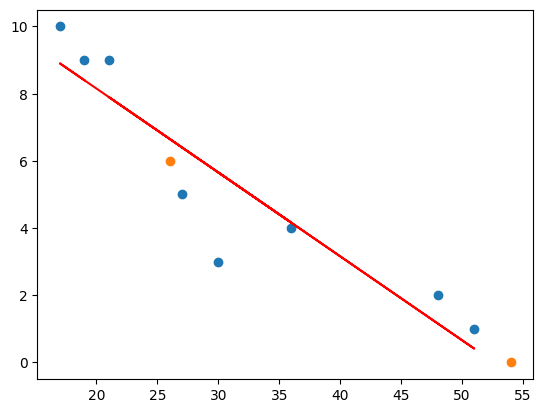

In [198]:
plt.plot(Student_x_train, Student_y_train, "o")
plt.plot(Student_x_test, Student_y_test, "o")
plt.plot(Student_x_train, y_train_predict, "r")

In [199]:
import statsmodels.api as sm

Student_x_train_sm = sm.add_constant(Student_x_train)

model = sm.OLS(Student_y_train, Student_x_train_sm).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               Retrasos   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     34.04
Date:                Sat, 13 Jul 2024   Prob (F-statistic):            0.00112
Time:                        12:55:25   Log-Likelihood:                -13.252
No. Observations:                   8   AIC:                             30.50
Df Residuals:                       6   BIC:                             30.66
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.1471      1.429      9.199      0.0

/usr/lib/python3/dist-packages/scipy/stats/_stats_py.py:1477: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


Interpreta los resultados de tu modelo. ¿Qué conclusiones puedes sacar de tu modelo y qué tan confiado estás en estas conclusiones? ¿Podemos decir que la edad es un buen predictor de la tardanza? Agrega tus respuestas como comentarios después de tu código.

In [200]:
#There is high R2 but model might be overfitted as test data has way higher R2 than training data..

## Desafío 2
Para la segunda parte de este laboratorio, utilizaremos el conjunto de datos vehicles.csv. Puedes encontrar una copia del conjunto de datos en la carpeta de GitHub. Este conjunto de datos incluye variables relacionadas con las características de los vehículos, incluyendo el modelo, la marca y los estándares de eficiencia energética, así como las emisiones de CO2 de cada coche. Como se discutió en clase, el objetivo de este ejercicio es predecir las emisiones de CO2 de los vehículos basándose en varias variables independientes.

In [201]:
# Import any libraries you may need & the data
vehicles = pd.read_csv("/home/ubuntu/Ironhack_all/Ironhack_22ndLab_RegressionAnalysis/vehicles.csv")

Vamos a utilizar las siguientes variables para nuestro análisis: Año, Cilindros, Barriles de Combustible/Año, MPG Combinado, y Costo de Combustible/Año. Utilizaremos 'Emisiones de CO2 Gramos/Milla' como nuestra variable de resultado.

Calcula las correlaciones entre cada una de estas variables y el resultado. ¿Cuál variable crees que será la más importante para determinar las emisiones de CO2? ¿Cuál proporciona la menor cantidad de información útil para determinar las emisiones de CO2? Agrega tus respuestas como comentarios después de tu código.

In [202]:
vehicles.head()

vehicles_clean = vehicles[['Year','Cylinders','Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year','CO2 Emission Grams/Mile']]
vehicles_x = vehicles[['Year','Cylinders','Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year']]
vehicles_y = vehicles[['CO2 Emission Grams/Mile']]

<Axes: >

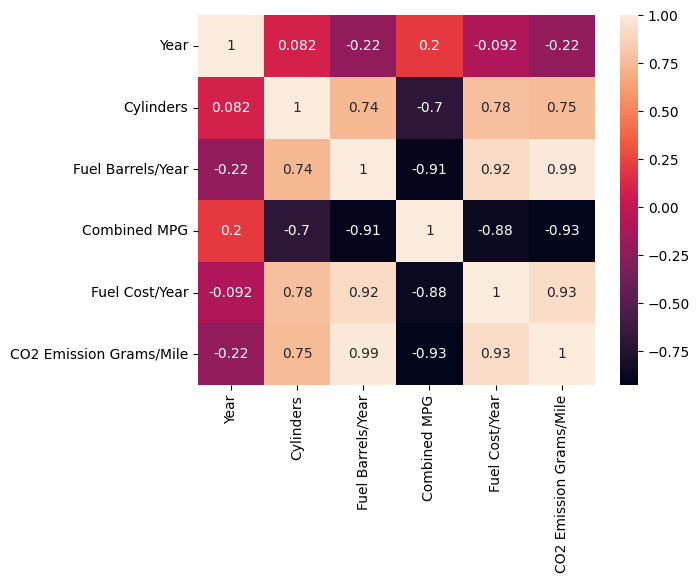

In [203]:
correlation_matrix = vehicles_clean.corr()

sns.heatmap(correlation_matrix, annot=True)

#By looking at the variables, strong relationships are: Cylinders, Fuel Barrels/Year, Combined MPG, Fuel Cost/Year

Construye un modelo de regresión para estos datos. ¿Qué tipo de regresión estás utilizando? Agrega tus respuestas como comentarios después de tu código.

In [204]:
car_x_train, car_x_test, car_y_train, car_y_test = train_test_split(vehicles_x, vehicles_y, test_size=0.2, random_state=111)

print(car_x_train.shape, car_x_test.shape, car_y_train.shape, car_y_test.shape)

lr = LinearRegression()

lr.fit(car_x_train, car_y_train)

(28761, 5) (7191, 5) (28761, 1) (7191, 1)


LinearRegression()

In [205]:
vehicles_x

,Year,Cylinders,Fuel Barrels/Year,Combined MPG,Fuel Cost/Year
0,1984,4.0,19.388824,17,1950
1,1984,6.0,25.354615,13,2550
2,1985,4.0,20.600625,16,2100
3,1985,6.0,25.354615,13,2550
4,1987,6.0,20.600625,16,2550
...,...,...,...,...,...
35947,2013,3.0,9.155833,36,1100
35948,2014,3.0,9.155833,36,1100
35949,2015,3.0,9.155833,36,1100
35950,2016,3.0,9.155833,36,1100


In [206]:
print(vehicles_x.columns)
print(lr.intercept_, lr.coef_)

print(lr.score(car_x_train,car_y_train), lr.score(car_x_test, car_y_test))


Index(['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG',
       'Fuel Cost/Year'],
      dtype='object')
[850.10895786] [[-0.3545223   2.03072559 18.28289238 -3.34039934  0.03566178]]
0.9790401022350957 0.9878105902880266


In [207]:
# print(list(zip(vehicles_x.columns, lr.coef_)))

coeffs = np.array(lr.coef_)
list(zip(vehicles_x, coeffs[0]))

[('Year', -0.3545223002179658),
 ('Cylinders', 2.0307255895631013),
 ('Fuel Barrels/Year', 18.282892383329717),
 ('Combined MPG', -3.3403993398374556),
 ('Fuel Cost/Year', 0.0356617791846224)]

/tmp/ipykernel_2406/2902444411.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(vehicles['Fuel Barrels/Year'])


<Axes: xlabel='Fuel Barrels/Year', ylabel='Density'>

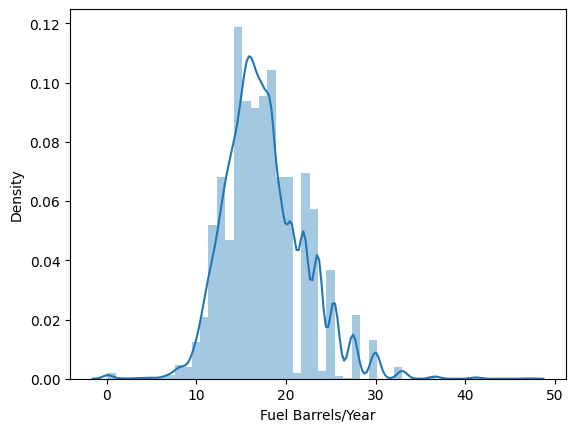

In [208]:
sns.distplot(vehicles['Fuel Barrels/Year'])

In [209]:
car_y_train_predict = lr.predict(car_x_train)
car_y_test_predict = lr.predict(car_x_test)

In [210]:
print(r2_score(car_y_train, car_y_train_predict), r2_score(car_y_test, car_y_test_predict))

0.9790401022350957 0.9878105902880266


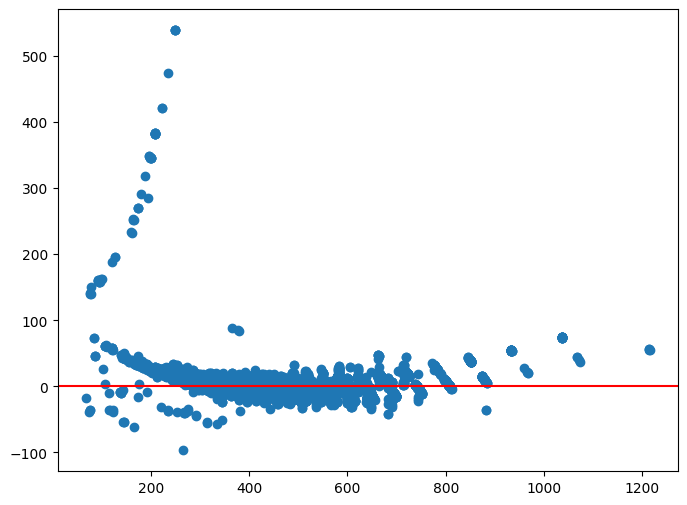

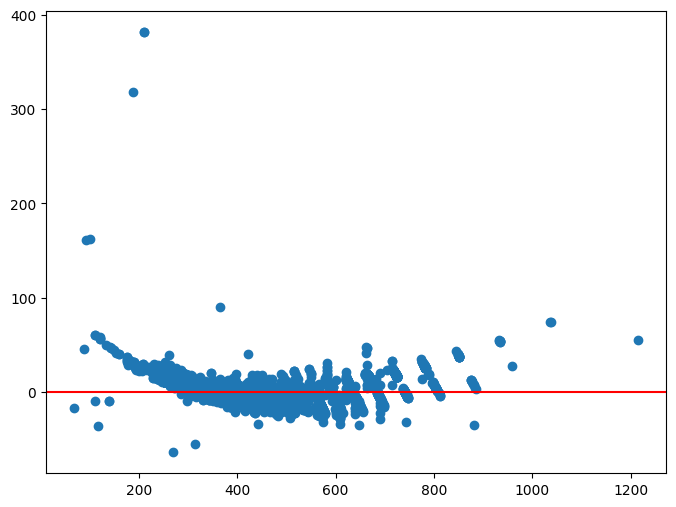

In [211]:
#Residuals

residuals_train = car_y_train - car_y_train_predict
residuals_test = car_y_test - car_y_test_predict

plt.figure(figsize=(8,6))
plt.scatter(car_y_train_predict, residuals_train, marker='o')
plt.axhline(y=0, color='r', linestyle= '-')

plt.figure(figsize=(8,6))
plt.scatter(car_y_test_predict, residuals_test, marker='o')
plt.axhline(y=0, color='r', linestyle= '-')

In [212]:
#Ridge

from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler

ridge = Ridge(alpha=1)
ridge.fit(car_x_train, car_y_train)
coefs_ridge = ridge.coef_

y_train_ridgepredict = ridge.predict(car_x_train)
y_test_ridgepredict = ridge.predict(car_x_test)

print(r2_score(car_y_train, y_train_ridgepredict), r2_score(car_y_test, y_test_ridgepredict))
print(coefs_ridge)



0.979040102223515 0.987810290528382
[[-0.35453413  2.03072915 18.28261882 -3.34047828  0.03566326]]


In [213]:
#Lasso

from sklearn.linear_model import Lasso

lasso = Lasso(alpha=1)

lasso.fit(car_x_train, car_y_train)
coefs_lasso = lasso.coef_

y_train_lassopredict = lasso.predict(car_x_train)
y_test_lassopredict = lasso.predict(car_x_test)

print(r2_score(car_y_train, y_train_lassopredict), r2_score(car_y_test, y_test_lassopredict))

print(lasso.coef_)

0.9789641946603482 0.9875331942736992
[-0.33708053  1.20899173 18.09516405 -3.29067192  0.03986113]


Imprime el resumen de tu regresión e interpreta los resultados. ¿Cuáles son las variables más importantes en tu modelo y por qué? ¿Qué conclusiones puedes sacar de tu modelo y qué tan confiado estás en estas conclusiones? Agrega tus respuestas como comentarios después de tu código.

In [214]:
#The most important variable is "Fuel Barrels/Year" with a coefficient as high as 18.28
#The model must be pretty good as R_square is nearing 1. 98% of the variance of the data can be explained by the variables chosen..
#Residuals for both train and test look good enough

## Desafío Extra: Análisis de Errores

Estoy sospechando de las últimas fiestas que he organizado: parece que cuanto más gente invito, más personas no pueden asistir. Para saber si mi presentimiento está respaldado por los datos, he decidido hacer un análisis. He recopilado mis datos en la tabla a continuación, donde X es el número de personas que invité, y Y es el número de personas que asistieron.

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

Queremos saber si la relación modelada por las dos variables aleatorias es lineal o no, y por lo tanto, si es apropiado modelarla con una regresión lineal.
Primero, construye un dataframe con los datos.

In [215]:
party = pd.DataFrame({'People invited':[1,3,4,6,8,9,11,14], 'Attendance':[1,2,4,4,5,7,8,13]})

In [216]:
party.head(10)

,People invited,Attendance
0,1,1
1,3,2
2,4,4
3,6,4
4,8,5
5,9,7
6,11,8
7,14,13


Dibuja un diagrama de dispersión (scatter plot) para los datos y ajusta una línea de regresión.

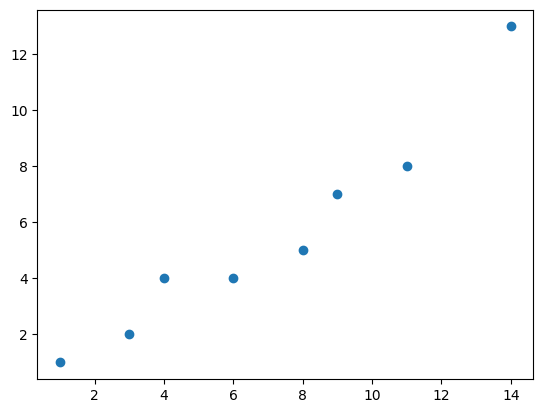

In [217]:
plt.scatter(party['People invited'], party['Attendance'])

¿Qué ves? ¿Qué te indica este gráfico sobre la probable relación entre las variables? Imprime los resultados de tu regresión.

[0.32330827] [[0.68421053]]
0.9433811802232855


/home/ubuntu/.local/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


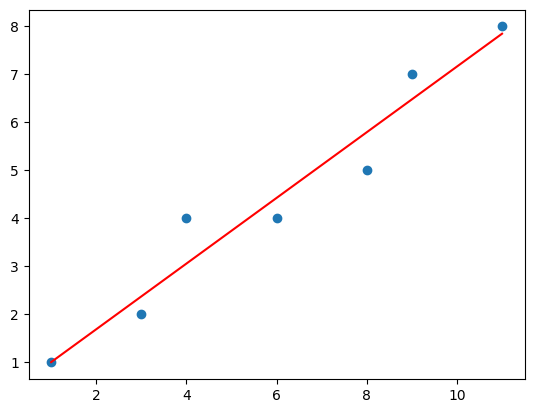

In [227]:
lr = LinearRegression()

lr.fit(party['People invited'].values.reshape(-1,1), party[['Attendance']])
y_predicted_party = lr.predict(party[['People invited']])

print(lr.intercept_, lr.coef_)
print(lr.score(party['People invited'].values.reshape(-1,1),party[['Attendance']]))

plt.scatter(party['People invited'], party['Attendance'])
plt.plot(party['People invited'], y_predicted_party, c='r')

¿Ves algún punto problemático o valores atípicos en tus datos? Elimina estos puntos y recalcula tu regresión. Imprime el nuevo diagrama de dispersión con tu nuevo modelo y los resultados de tu modelo.

0.9433811802232855
[0.32330827] [[0.68421053]]
0.9433811802232855


/home/ubuntu/.local/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


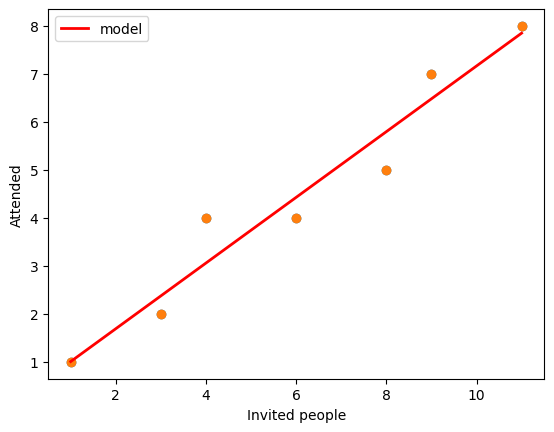

In [230]:
new_party = party.iloc[:7]
plt.scatter(new_party['People invited'], new_party['Attendance'])
lr.fit(new_party[['People invited']], new_party[['Attendance']])
print(lr.score(new_party['People invited'].values.reshape(-1,1),new_party[['Attendance']]))
print(lr.intercept_, lr.coef_)

y_predicted = lr.predict(new_party[['People invited']])

print(r2_score(new_party['Attendance'],y_predicted))

plt.scatter(new_party[['People invited']], new_party[['Attendance']])
plt.plot(new_party[['People invited']], y_predicted, c='r', lw=2, label='model')
plt.xlabel('Invited people')
plt.ylabel('Attended')
plt.legend()

¿Qué cambió? Basado en los resultados de los dos modelos y tus gráficos, ¿qué puedes decir sobre la forma de los datos con el punto problemático y sin él?

In [220]:
# Without the "outlier" it appears to be more linear and the R2 is higher